In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/startup_data.csv", nrows=30)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


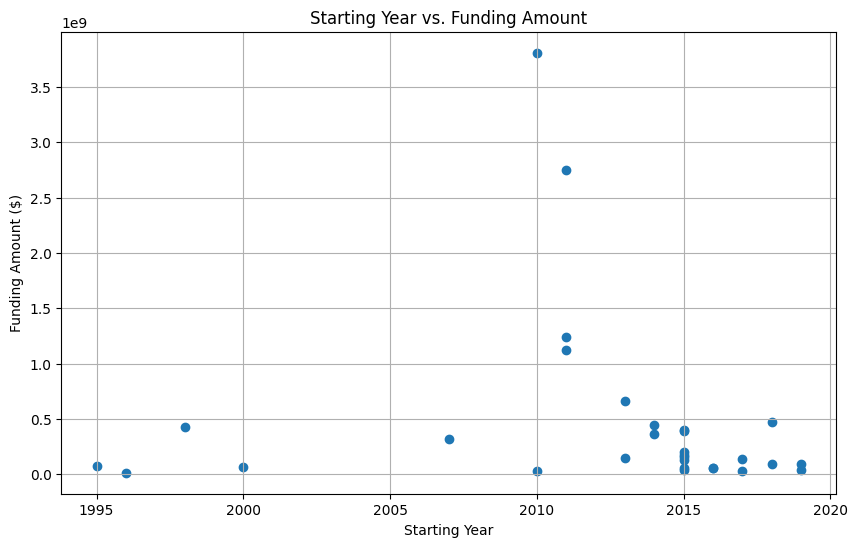

In [8]:
import matplotlib.pyplot as plt

# Example 1: Starting Year vs. Funding Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Starting Year'], df['Funding Amount in $'])
plt.xlabel('Starting Year')
plt.ylabel('Funding Amount ($)')
plt.title('Starting Year vs. Funding Amount')
plt.grid(True)
plt.show()

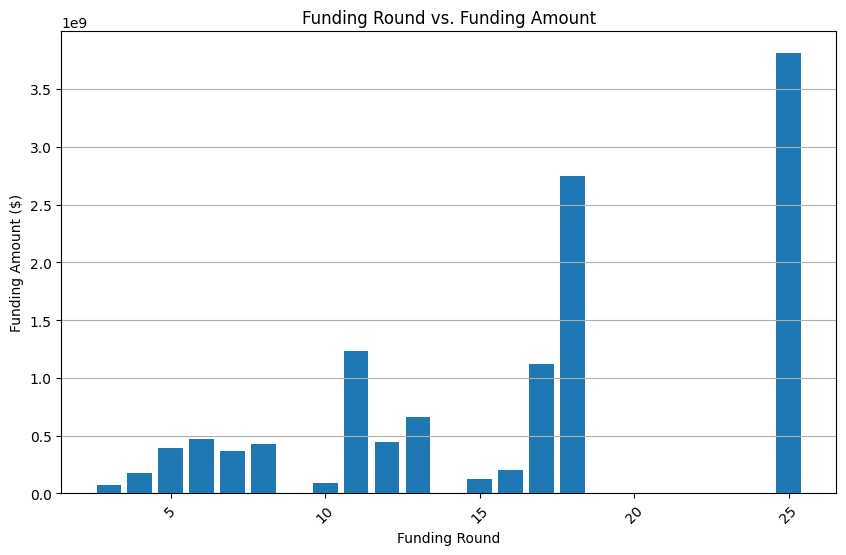

In [7]:
# Example 2: Funding Round vs. Funding Amount
plt.figure(figsize=(10, 6))
plt.bar(df['Funding Round'], df['Funding Amount in $'])
plt.xlabel('Funding Round')
plt.ylabel('Funding Amount ($)')
plt.title('Funding Round vs. Funding Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

In [12]:
# Perform the ADF test on the 'Starting Year' attribute
test_result = adfuller(df['Funding Round'])

# Define the ADF test function
def adfuller_test(attribute):
    result = adfuller(attribute)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

# Call the ADF test function with the 'Starting Year' attribute
print("ADF Test for 'Starting Year':")
adfuller_test(df['Starting Year'])


ADF Test for 'Starting Year':
ADF Test Statistic: -4.851544550487032
p-value: 4.329466440348551e-05
#Lags Used: 0
Number of Observations Used: 29
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [32]:
model = ARIMA(df['Funding Round'], order=(5,1,0))
results = model.fit()

In [33]:
forecast = results.forecast(steps=15)

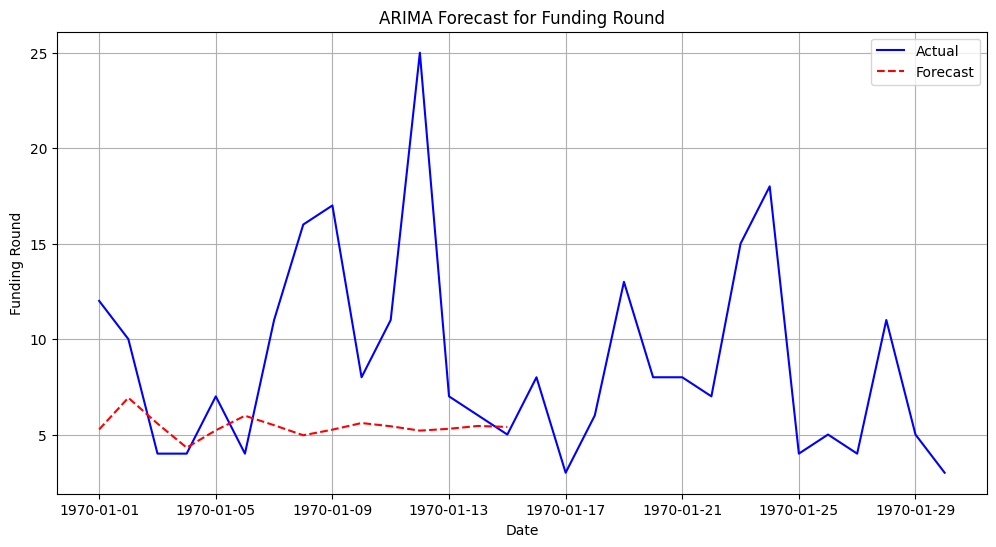

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Funding Round'], label='Actual', color='blue')
plt.plot(pd.date_range(start=df.index[-1], periods=15, freq='D'), forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast for Funding Round')
plt.xlabel('Date')
plt.ylabel('Funding Round')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
forecast_dates = pd.date_range(start=df.index[-1], periods=15, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Funding Round': forecast})
print("\nForecasted Total Funding Round for the next 7-8 days:")
print(forecast_df)


Forecasted Total Funding Round for the next 7-8 days:
                            Date  Funding Round
30 1970-01-01 00:00:00.000000029       5.269448
31 1970-01-02 00:00:00.000000029       6.925791
32 1970-01-03 00:00:00.000000029       5.573372
33 1970-01-04 00:00:00.000000029       4.314506
34 1970-01-05 00:00:00.000000029       5.221131
35 1970-01-06 00:00:00.000000029       5.984918
36 1970-01-07 00:00:00.000000029       5.488379
37 1970-01-08 00:00:00.000000029       4.961636
38 1970-01-09 00:00:00.000000029       5.255396
39 1970-01-10 00:00:00.000000029       5.603468
40 1970-01-11 00:00:00.000000029       5.433232
41 1970-01-12 00:00:00.000000029       5.205595
42 1970-01-13 00:00:00.000000029       5.301192
43 1970-01-14 00:00:00.000000029       5.450712
44 1970-01-15 00:00:00.000000029       5.397323
